# Symbolic description of the system through perturbative approach.

We hereby define the following system :

$$ \partial_t \hat{S} = \gamma \hat{S} \wedge \vec{B} - \Gamma \hat{S} + R_{op} (S_0 - \hat{S})$$

with :
- $\hat{S} = \hat{S}_{ss} + \delta S$
- $\vec{B}_{ss} = (0,B_0,0), \delta B = (0,0,\delta B_1), \vec{B} = \vec{B}+ \vec{\delta B}$
- $\Gamma$ : relaxation rate
- $R_{op} = \sigma_{abs}\phi_{opt}$ : pumping rate
- $S_0$ : the maximum polarization of our spin in the case of no magnetic field and relaxation

We write the equation with the steady state equation and the perturbation

The steady state equation is the solution of the following system:

$$\partial_t S_{ss} = \begin{pmatrix} -\gamma B_0 S_z \\ 0 \\ \gamma B_0 S_x \end{pmatrix} - \Gamma S_{ss} + R_{op} (S_0\hat{z} - S_{ss})$$

Now our total equation becomes the following :

$$\partial_t S_{ss} + \partial_t \delta S = \gamma \begin{pmatrix} S_x + \delta S_x \\ S_y + \delta S_y \\ S_z + \delta S_z \end{pmatrix} \wedge \begin{pmatrix} 0 \\ B_0 \\ \delta B_1(t) \end{pmatrix} - \Gamma S+\delta S + R_{op} (S_0\hat{z} - S+\delta S)$$

### Steady state solution :
$$\partial_t S_{ss} = 0$$

$$\begin{cases} - \gamma B_0 S_z - \Gamma S_x - R_{op} S_x = 0  \\
 -(\Gamma + R_{op}) S_y = 0 \\
 \gamma B_0 S_x - \Gamma S_z + R_{op}(S_0 - S_z) = 0  \end{cases}$$

Leading to the steady state solutions:

$$\begin{cases} S_x = -\frac{R_{op}S_0 \gamma B_0}{(\gamma B_0)^2 - (\Gamma+R_{op})^2} \\
S_y = 0 \\
S_z = \frac{(\Gamma+R_{op})R_{op}S_0}{(\gamma B_0)^2 - (\Gamma+R_{op})^2} \end{cases}$$

### Perturbative solutions

We now have the following system :

$$\partial_t S_{ss} + \partial_t \delta S = \begin{pmatrix} (S_y + \delta S_y) \delta B_1 - (S_z + \delta S_z) B_0 \\
                                                            -(S_x + \delta S_x) \delta B_1(t) \\
                                                            (S_x + \delta S_x) B_0 
                                            \end{pmatrix}
                                            - \Gamma (S_{ss} + \delta S) + R_{op} (S_0 \hat{z} - S+\delta S)$$

We assume that the product of two $\delta$ leads to 0, and that $\partial_t S_{ss} = 0$, and already know that $S_y = 0$, remove the terms that are exactly the same as the ones of the steady state equation and we thus get :

$$ \begin{cases} \partial_t \delta S_x = -  \delta S_z B_0 - \Gamma \delta S_x - R_{op} \delta S_x\\
                \partial_t \delta S_y = -\gamma \delta B_1(t) S_x - \Gamma \delta S_y - R_{op} \delta S_y\\
                \partial_t \delta S_z = \gamma B_0 \delta S_x - \Gamma \delta S_z - R_{op} (S_0 - \delta S_z) \end{cases}$$

We suppose a solution of the type $\delta S_i(t) = \delta S_i e^{-i\omega t}$ and its time derivative $\partial_t \delta S_i(t) = -i\omega t \delta S e^{-i\omega t}$.
The exponential appearing everywhere except in the term $-\gamma \delta B_1 S_x$, we can remove it and just add the complex exponential to this one term, giving us the following system :

$$ \begin{cases} -i \omega \delta S_x = -  \delta S_z B_0 - \Gamma \delta S_x - R_{op} \delta S_x\\
                -i \omega \delta S_y = -\gamma \delta B_1(t) S_x e^{i \omega t} - \Gamma \delta S_y - R_{op} \delta S_y\\
                -i \omega \delta S_z = \gamma B_0 \delta S_x - \Gamma \delta S_z - R_{op} (S_0 - \delta S_z) \end{cases}$$

Since $\delta B_1 = \delta B_1 \cos(\omega_{rf} t)$, we have $\delta \frac{B_1}{2} (e^{-i \omega_{rf} t} + e^{i \omega_{rf} t}) e^{i\omega t}$
We assume that $\omega_{rf} \approx \omega$, such that the term $e^{i (\omega_{rf}+\omega)t}$ is assumed as fast oscillating and averaged to 0. We will note $\omega - \omega_{rf} = \Delta \omega$

Our final system is thus :

$$ \begin{cases} -i \omega \delta S_x = -  \delta S_z B_0 - \Gamma \delta S_x - R_{op} \delta S_x\\
                -i \omega \delta S_y = -\gamma \delta B_1(t) S_x e^{i \Delta \omega t} - \Gamma \delta S_y - R_{op} \delta S_y\\
                -i \omega \delta S_z = \gamma B_0 \delta S_x - \Gamma \delta S_z - R_{op} (S_0 - \delta S_z) \end{cases}$$

Out of laziness, we enter this system in the following sympy solver:

In [1]:
import sympy
from sympy import symbols, Eq, solve, I

def solve_system_symbolically():
    # Define parameters (symbolic). 
    # We allow them to be complex=True because of the i*w terms,
    # but you may restrict some to real if you prefer.
    w, gamma, B0 = symbols('w gamma B0', complex=True)
    delta, B1 = symbols('delta B1', complex=True)
    Sx_par = sympy.Symbol('Sx', complex=True)  # 'Sx' is treated as a parameter here
    Gamma_ = sympy.Symbol('Gamma', complex=True)
    R_op = sympy.Symbol('R_op', complex=True)
    S0 = sympy.Symbol('S0', complex=True)
    
    # Define the unknowns x, y, z (potentially complex)
    x, y, z = symbols('x y z', complex=True)
    
    # The system from the image, rewritten so that each equation = 0:
    #
    # 1) -i w x = - gamma * z * B0 - Gamma * x - R_op * x
    #    --> -i w x + gamma B0 z + (Gamma + R_op) x = 0
    eq1 = Eq(-I*w*x + gamma*B0*z + (Gamma_ + R_op)*x, 0)
    
    # 2) -i w y = - delta * B1 * Sx - Gamma * y - R_op * y
    #    --> -i w y + delta B1 Sx + (Gamma + R_op) y = 0
    eq2 = Eq(-I*w*y + gamma*B1*Sx_par + (Gamma_ + R_op)*y, 0)
    
    # 3) -i w z = gamma * B0 * x - Gamma * z + R_op (S0 - z)
    #    --> -i w z - gamma B0 x + (Gamma + R_op) z - R_op * S0 = 0
    eq3 = Eq(-I*w*z - gamma*B0*x + (Gamma_ + R_op)*z - R_op*S0, 0)
    
    # Solve for x, y, z symbolically
    sol = solve([eq1, eq2, eq3], [x, y, z], dict=True)
    
    # Print the solution(s)
    print("Solution(s) for x, y, z:")
    for i, s in enumerate(sol, 1):
        print(f"  Solution {i}:")
        print(f"    x = {s[x]}")
        print(f"    y = {s[y]}")
        print(f"    z = {s[z]}")

if __name__ == "__main__":
    solve_system_symbolically()

Solution(s) for x, y, z:
  Solution 1:
    x = B0*R_op*S0*gamma/(-B0**2*gamma**2 - Gamma**2 - 2*Gamma*R_op + 2*I*Gamma*w - R_op**2 + 2*I*R_op*w + w**2)
    y = -I*B1*Sx*gamma/(I*Gamma + I*R_op + w)
    z = (-Gamma*R_op*S0 - R_op**2*S0 + I*R_op*S0*w)/(-B0**2*gamma**2 - Gamma**2 - 2*Gamma*R_op + 2*I*Gamma*w - R_op**2 + 2*I*R_op*w + w**2)


Which translated back to latex gives us:

$$\begin{cases}
\delta S_x = \frac{B_0\, R_{\text{op}}\, S_0\, \gamma}
{\,-B_0^{2}\,\gamma^{2} \;-\; \Gamma^{2} \;-\; 2\,\Gamma\,R_{\text{op}} \;+\; 2\,\mathrm{i}\,\Gamma\,\omega \;-\; R_{\text{op}}^{2} \;+\; 2\,\mathrm{i}\,R_{\text{op}}\,\omega \;+\; \omega^{2}} \\

\delta S_y = \frac{-\,\mathrm{i}\,B_1\,S_x\,\delta}
{\mathrm{i}\,\Gamma \;+\; \mathrm{i}\,R_{\text{op}} \;+\; \omega} \\

\delta S_z = \frac{-\,\Gamma\,R_{\text{op}}\,S_0 \;-\; R_{\text{op}}^{2}\,S_0 \;+\; \mathrm{i}\,R_{\text{op}}\,S_0\,\omega}
{\,-B_0^{2}\,\gamma^{2} \;-\; \Gamma^{2} \;-\; 2\,\Gamma\,R_{\text{op}} \;+\; 2\,\mathrm{i}\,\Gamma\,\omega \;-\; R_{\text{op}}^{2} \;+\; 2\,\mathrm{i}\,R_{\text{op}}\,\omega \;+\; \omega^{2}} \end{cases}
$$

With some reorganization of the terms, we get the following expression (and given $\gamma B_0= \omega_0$) : 

$$\begin{cases} \delta S_x = \frac{B_0\, R_{op}\, S_0\, \gamma}{(\Gamma + R_{op} + i \omega)^2 - \omega_0^2} , \\[8pt]
                \delta S_y = \frac{\frac{\delta B_1}{2} e^{i \Delta \omega t}S_x }{i\omega - (\Gamma + R_{op})} , \\[8pt]
                \delta S_z = \frac{-\Gamma - R_{op} + i \omega}{(\Gamma + R_{op} + i \omega)^2 - \omega_0^2} R_{op}S_0 \end{cases}$$

Finally, injecting $S_x$ into $\delta S_y$, we get:

$$
\delta S_y = -\frac{\delta B_1}{2}\, e^{i \Delta \omega t}\, \frac{R_{op} S_0 \gamma B_0}{\left[(\omega_0)^2 - (\Gamma + R_{op})^2\right] \left[i\omega - (\Gamma + R_{op})\right]}.
$$

Now I must plot these three expressions as function of omega. Make a Bode Diagram (Real part as function of omega).


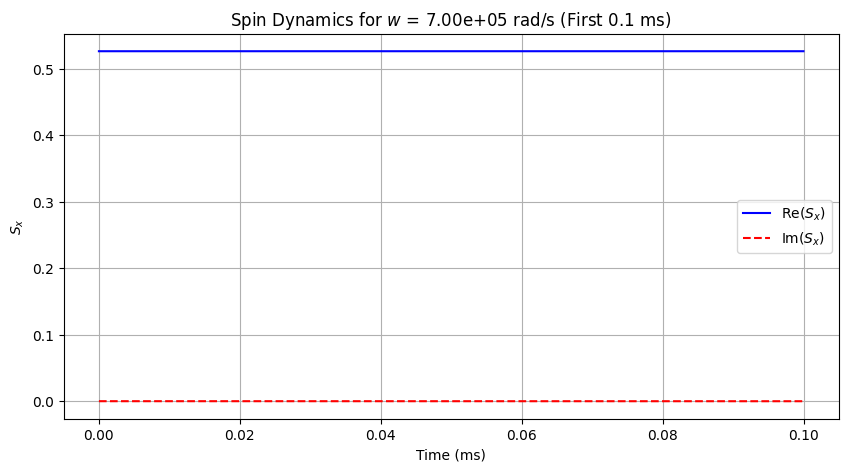

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
gamma = 7e9
Gamma = 2000
R_op = 3e5
B0 = 100e-6
B1 = 1e-5
S0 = 1

# RF freq
w = np.linspace(gamma * B0 - 1000, gamma * B0 + 1000, 1000)


# Compute Sx for ONE frequency at a time
denominator = (gamma * B0) ** 2 - (Gamma + R_op) ** 2
Sx_real = []
Sx_imag = []

index = 500  # Pick a specific frequency index to analyze

for t in t_eval:
    Sx_t = (R_op * S0 * gamma * B0 / denominator) * np.exp(1j * (gamma*B0 - w[index]) * t)
    Sx_real.append(Sx_t.real)
    Sx_imag.append(Sx_t.imag)

# Convert lists to NumPy arrays
Sx_real = np.array(Sx_real)
Sx_imag = np.array(Sx_imag)

# **Limit to the first 0.1 ms**
t_limit = 0.1e-3  # 0.1 ms
mask = t_eval <= t_limit  # Mask to select only the first 0.1 ms

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t_eval[mask] * 1e3, Sx_real[mask], label=r"Re$(S_x)$", color="b")  # Convert time to ms
plt.plot(t_eval[mask] * 1e3, Sx_imag[mask], label=r"Im$(S_x)$", color="r", linestyle="dashed")

# Labels and legend
plt.xlabel("Time (ms)")
plt.ylabel(r"$S_x$")
plt.title(f"Spin Dynamics for $w$ = {w[index]:.2e} rad/s (First 0.1 ms)")
plt.legend()
plt.grid()
plt.show()
